In [17]:
import numpy as np

class testdata:
    def __init__(self):
        print("Loading testdata")
        self.tdata = [
            [0.001, "iron"],
            [0.001, "gold"],
            [0.001, "silver"],
            [0.001, "copper"]
        ]
        self.data = np.array([
            [35, 50, 5],
            [36, 51, 5],
            [34, 48, 5],
            [35, 25, 2],
            [35, 1, 16],
            [1,1,1],
            [14, 6, 4]
        ])
        self.target = [
            0,
            0,
            0,
            1,
            2,
            1,
            3
        ]


# sweden data
class etrac:
    def __init__(self):
        print("Loading etrac data")
        self.tdata = [
            [1, 0.01, "iron"],
            [2, 0.03, "pulltab"],
            [3, 1, "bottle top"],
            [4, 0.09, "modern pull tab"],
            [5, 0.12, "10kr"],
            [6, 0.15, "ring pull"],
            [7, 0.18, "5kr"],
            [8, 0.21, "ring pull handle only"],
            [9, 0.24, "bottle top"],
            [10, 0.27, "5 ore"],
            [11, 0.30, "wine bottle top"],
            [12, 0.33, "iron screw"],
            [13, 0.36, "aluminium piece"],
            [14, 0.39, "dog leash clip"],
            [15, 0.42, "25 ore"],
            [16, 0.45, "bottle top ring"],
            [17, 0.48, "nail"]
        ]
        
        # fe, co, depth
        self.data = np.array([
            [35, 50, 5],
            [12, 4, 5],
            [12, 6, 5],
            [13, 1, 5],
            [12, 25, 5],
            [12, 22, 5],
            [12, 28, 5],
            [12, 21, 5],
            [12, 40, 5],
            [14, 27, 5],
            [12, 18, 5],
            [9, 26, 5],
            [13, 46, 5],
            [11, 20, 5],
            [12, 42, 5],
            [9, 33, 5],
            [12, 32, 5],
            [10, 28, 5],
            [11, 22, 5],
            [12, 24, 5],
            [12, 22, 5],
            [12, 28, 5],
            [22, 42, 5],
            [15, 16, 5],
            [13, 30, 5],
            [14, 29, 5],
            [12, 40, 5],
            [14, 6, 5],
            [15, 28, 5],
            [12, 39, 5],
            [9, 6, 5],
            [26, 39, 5]
            ]).astype(np.float)
        self.target = [
            0,
            1,
            1,
            2,
            2,
            2,
            2,
            3,
            4,
            2,
            5,
            6,
            2,
            7,
            8,
            9,
            9,
            10,
            10,
            10,
            1,
            10,
            11,
            12,
            2,
            2,
            13,
            14,
            15,
            2,
            12,
            16
        ]
        
print("Loaded")

Loaded


Loading testdata
[[35 50  5]
 [36 51  5]
 [34 48  5]
 [35 25  2]
 [35  1 16]
 [ 1  1  1]
 [14  6  4]]
[0, 0, 0, 1, 2, 1, 3]


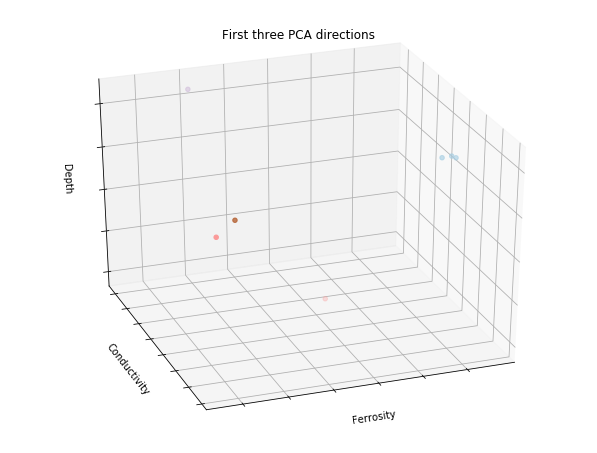

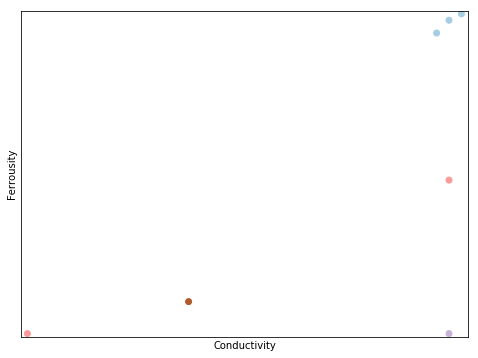

In [18]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
# iris = datasets.load_iris()
iris = testdata()
X = iris.data[:, :3]  # we only take the first two features.
print(X)
Y = iris.target
print(Y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.ylim(plt.ylim()[::-1])

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Conductivity')
plt.ylabel('Ferrousity')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("Ferrosity")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Conductivity")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Depth")
ax.w_zaxis.set_ticklabels([])

plt.show()

Loading etrac data


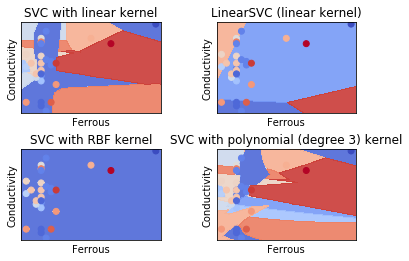

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
# iris = datasets.load_iris()
iris = etrac()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.9)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Ferrous')
    plt.ylabel('Conductivity')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()